# Lab 2 - IA340

## View the Data

In [62]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://ia340-2025-fall-wei-demo-5465148971/Crime_Incidents_in_2025.csv') # load the data from s3
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,400588.4650,129470.0424,5131706,2025/02/05 05:00:00+00,MIDNIGHT,GUN,HOMICIDE,800 - 899 BLOCK OF XENIA STREET SE,400588.464990,129470.042358,...,009801 1,9801.0,Precinct 121,38.833020,-76.993222,NaN,2005/09/27 07:25:00+00,2005/09/27 07:26:00+00,786940029,NaN
1,405684.5761,135633.8979,10133557,2025/06/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,4600 - 4699 BLOCK OF A STREET SE,405684.576067,135633.897851,...,009906 1,9906.0,Precinct 104,38.888528,-76.934478,NaN,2010/09/15 00:45:00+00,2010/09/14 04:00:00+00,786940034,NaN
2,397581.8300,141846.4300,25079053,2025/05/27 22:19:32+00,EVENING,OTHERS,ROBBERY,4400 - 4499 BLOCK OF IOWA AVENUE NW,397581.830000,141846.430000,...,002501 1,2501.0,Precinct 48,38.944508,-77.027895,NaN,2025/05/27 21:11:00+00,2025/05/27 22:18:00+00,786942870,NaN
3,399215.8700,138751.2000,25079273,2025/08/11 17:39:31+00,DAY,OTHERS,ROBBERY,1800 - 2199 BLOCK OF NORTH CAPITOL STREET,399215.870000,138751.200000,...,003302 1,3302.0,Precinct 19,38.916628,-77.009042,NaN,2025/05/28 07:40:00+00,2025/05/28 07:45:00+00,786944170,NaN
4,397700.5000,137976.2500,25421607,2025/05/05 18:31:00+00,DAY,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF P STREET NW,397700.500000,137976.250000,...,004901 3,4901.0,Precinct 18,38.909644,-77.026513,NaN,2025/05/04 14:45:00+00,2025/05/04 14:50:00+00,786944171,NaN


In [63]:
df.shape 

(16612, 25)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16612 entries, 0 to 16611
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     16612 non-null  float64
 1   Y                     16612 non-null  float64
 2   CCN                   16612 non-null  int64  
 3   REPORT_DAT            16612 non-null  object 
 4   SHIFT                 16612 non-null  object 
 5   METHOD                16612 non-null  object 
 6   OFFENSE               16612 non-null  object 
 7   BLOCK                 16612 non-null  object 
 8   XBLOCK                16612 non-null  float64
 9   YBLOCK                16612 non-null  float64
 10  WARD                  16607 non-null  float64
 11  ANC                   16607 non-null  object 
 12  DISTRICT              16561 non-null  float64
 13  PSA                   16561 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  16607 non-null  object 
 15  BLOCK_GROUP        

In [65]:
df.describe()

,X,Y,CCN,XBLOCK,YBLOCK,WARD,DISTRICT,PSA,CENSUS_TRACT,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID
count,16612.000000,16612.000000,1.661200e+04,16612.000000,16612.000000,16607.000000,16561.000000,16561.000000,16601.000000,16612.000000,16612.000000,1.661200e+04,0.0
mean,399223.899504,137978.638332,2.509500e+07,399223.899504,137978.638332,4.397844,3.681722,372.759133,7635.496295,38.909663,-77.008955,7.873447e+08,NaN
std,3011.298002,3482.734790,5.500669e+05,3011.298002,3482.734790,2.269673,1.825169,182.120965,35568.341322,0.031373,0.034721,1.073366e+05,NaN
min,390519.560000,127300.240000,5.131706e+06,390519.560000,127300.240000,1.000000,1.000000,101.000000,101.000000,38.813473,-77.109338,7.869400e+08,NaN
25%,397229.100000,136474.240300,2.503431e+07,397229.100000,136474.240252,2.000000,2.000000,207.000000,3500.000000,38.896116,-77.031952,7.872527e+08,NaN
50%,398916.585000,137848.510000,2.507004e+07,398916.585006,137848.510000,5.000000,4.000000,401.000000,7304.000000,38.908480,-77.012499,7.872810e+08,NaN
75%,401014.009600,139965.547500,2.510658e+07,401014.009567,139965.547500,6.000000,5.000000,505.000000,9204.000000,38.927567,-76.988310,7.874623e+08,NaN
max,407806.750900,147250.570000,8.927285e+07,407806.750917,147250.570000,8.000000,7.000000,708.000000,980000.000000,38.993186,-76.910012,7.875041e+08,NaN


I have 16612 rows and 25 columns. Most of the columns appear to be text columns. I'm probably going to get rid of some of the columns because they are redundent.

## Clean the Data

In [66]:
df = df.rename(columns={"OFFENSE": "CRIME"})
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,CRIME,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,400588.4650,129470.0424,5131706,2025/02/05 05:00:00+00,MIDNIGHT,GUN,HOMICIDE,800 - 899 BLOCK OF XENIA STREET SE,400588.464990,129470.042358,...,009801 1,9801.0,Precinct 121,38.833020,-76.993222,NaN,2005/09/27 07:25:00+00,2005/09/27 07:26:00+00,786940029,NaN
1,405684.5761,135633.8979,10133557,2025/06/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,4600 - 4699 BLOCK OF A STREET SE,405684.576067,135633.897851,...,009906 1,9906.0,Precinct 104,38.888528,-76.934478,NaN,2010/09/15 00:45:00+00,2010/09/14 04:00:00+00,786940034,NaN
2,397581.8300,141846.4300,25079053,2025/05/27 22:19:32+00,EVENING,OTHERS,ROBBERY,4400 - 4499 BLOCK OF IOWA AVENUE NW,397581.830000,141846.430000,...,002501 1,2501.0,Precinct 48,38.944508,-77.027895,NaN,2025/05/27 21:11:00+00,2025/05/27 22:18:00+00,786942870,NaN
3,399215.8700,138751.2000,25079273,2025/08/11 17:39:31+00,DAY,OTHERS,ROBBERY,1800 - 2199 BLOCK OF NORTH CAPITOL STREET,399215.870000,138751.200000,...,003302 1,3302.0,Precinct 19,38.916628,-77.009042,NaN,2025/05/28 07:40:00+00,2025/05/28 07:45:00+00,786944170,NaN
4,397700.5000,137976.2500,25421607,2025/05/05 18:31:00+00,DAY,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF P STREET NW,397700.500000,137976.250000,...,004901 3,4901.0,Precinct 18,38.909644,-77.026513,NaN,2025/05/04 14:45:00+00,2025/05/04 14:50:00+00,786944171,NaN


In [67]:
df.isnull().sum()

X                           0
Y                           0
CCN                         0
REPORT_DAT                  0
SHIFT                       0
METHOD                      0
CRIME                       0
BLOCK                       0
XBLOCK                      0
YBLOCK                      0
WARD                        5
ANC                         5
DISTRICT                   51
PSA                        51
NEIGHBORHOOD_CLUSTER        5
BLOCK_GROUP                11
CENSUS_TRACT               11
VOTING_PRECINCT             5
LATITUDE                    0
LONGITUDE                   0
BID                     13327
START_DATE                  2
END_DATE                 1174
OBJECTID                    0
OCTO_RECORD_ID          16612
dtype: int64

In [68]:
df = df[['X', 'Y', 'CCN', 'REPORT_DAT', 'SHIFT', 'METHOD', 'CRIME', 'BLOCK', 'XBLOCK', 'YBLOCK', 'LATITUDE', 'LONGITUDE']]
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,CRIME,BLOCK,XBLOCK,YBLOCK,LATITUDE,LONGITUDE
0,400588.4650,129470.0424,5131706,2025/02/05 05:00:00+00,MIDNIGHT,GUN,HOMICIDE,800 - 899 BLOCK OF XENIA STREET SE,400588.464990,129470.042358,38.833020,-76.993222
1,405684.5761,135633.8979,10133557,2025/06/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,4600 - 4699 BLOCK OF A STREET SE,405684.576067,135633.897851,38.888528,-76.934478
2,397581.8300,141846.4300,25079053,2025/05/27 22:19:32+00,EVENING,OTHERS,ROBBERY,4400 - 4499 BLOCK OF IOWA AVENUE NW,397581.830000,141846.430000,38.944508,-77.027895
3,399215.8700,138751.2000,25079273,2025/08/11 17:39:31+00,DAY,OTHERS,ROBBERY,1800 - 2199 BLOCK OF NORTH CAPITOL STREET,399215.870000,138751.200000,38.916628,-77.009042
4,397700.5000,137976.2500,25421607,2025/05/05 18:31:00+00,DAY,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF P STREET NW,397700.500000,137976.250000,38.909644,-77.026513


I renamed the column 'OFFENSE' to 'CRIME'. One column had 16612 missing values. I fixed this by deleting that column.

## Manipulate the Data

In [69]:
df['CRIME']

0           HOMICIDE
1           HOMICIDE
2            ROBBERY
3            ROBBERY
4        THEFT/OTHER
            ...     
16607    THEFT/OTHER
16608    THEFT/OTHER
16609    THEFT/OTHER
16610    THEFT/OTHER
16611    THEFT/OTHER
Name: CRIME, Length: 16612, dtype: object

In [72]:
df.sort_values(by='REPORT_DAT')

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,CRIME,BLOCK,XBLOCK,YBLOCK,LATITUDE,LONGITUDE
4000,398731.020,138367.250,24202232,2025/01/01 07:18:24+00,MIDNIGHT,GUN,ASSAULT W/DANGEROUS WEAPON,201 - 298 BLOCK OF FLORIDA AVENUE NW,398731.02000,138367.250000,38.913169,-77.014632
4444,399488.810,129856.570,25000060,2025/01/01 07:23:31+00,MIDNIGHT,GUN,ROBBERY,3720 - 3749 BLOCK OF 1ST STREET SE,399488.81000,129856.570000,38.836502,-77.005888
4443,402248.435,133774.269,25000057,2025/01/01 07:39:16+00,MIDNIGHT,GUN,ASSAULT W/DANGEROUS WEAPON,2200 - 2299 BLOCK OF MINNESOTA AVENUE SE,402248.43504,133774.268986,38.871792,-76.974090
12459,404253.390,136093.870,25000103,2025/01/01 08:10:09+00,MIDNIGHT,KNIFE,ROBBERY,3806 - 3843 BLOCK OF MINNESOTA AVENUE NE,404253.39000,136093.870000,38.892680,-76.950971
12669,399351.720,137531.680,24201956,2025/01/01 10:52:24+00,MIDNIGHT,OTHERS,THEFT/OTHER,1 - 99 BLOCK OF M STREET NE,399351.72000,137531.680000,38.905642,-77.007474
...,...,...,...,...,...,...,...,...,...,...,...,...
15468,394146.500,138598.330,25129124,2025/08/25 00:33:21+00,EVENING,OTHERS,THEFT F/AUTO,1738 - 1898 BLOCK OF WISCONSIN AVENUE NW,394146.50000,138598.330000,38.915232,-77.067495
5127,394146.500,138598.330,25129306,2025/08/25 00:48:14+00,EVENING,OTHERS,THEFT F/AUTO,1738 - 1898 BLOCK OF WISCONSIN AVENUE NW,394146.50000,138598.330000,38.915232,-77.067495
15470,397243.780,140420.090,25129301,2025/08/25 01:10:50+00,EVENING,OTHERS,THEFT F/AUTO,1330 - 1399 BLOCK OF MONROE STREET NW,397243.78000,140420.090000,38.931658,-77.031788
6466,398413.380,137052.450,25129210,2025/08/25 01:55:05+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,443 - 499 BLOCK OF I STREET NW,398413.38000,137052.450000,38.901324,-77.018291


In [71]:
df[0:5]

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,CRIME,BLOCK,XBLOCK,YBLOCK,LATITUDE,LONGITUDE
0,400588.4650,129470.0424,5131706,2025/02/05 05:00:00+00,MIDNIGHT,GUN,HOMICIDE,800 - 899 BLOCK OF XENIA STREET SE,400588.464990,129470.042358,38.833020,-76.993222
1,405684.5761,135633.8979,10133557,2025/06/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,4600 - 4699 BLOCK OF A STREET SE,405684.576067,135633.897851,38.888528,-76.934478
2,397581.8300,141846.4300,25079053,2025/05/27 22:19:32+00,EVENING,OTHERS,ROBBERY,4400 - 4499 BLOCK OF IOWA AVENUE NW,397581.830000,141846.430000,38.944508,-77.027895
3,399215.8700,138751.2000,25079273,2025/08/11 17:39:31+00,DAY,OTHERS,ROBBERY,1800 - 2199 BLOCK OF NORTH CAPITOL STREET,399215.870000,138751.200000,38.916628,-77.009042
4,397700.5000,137976.2500,25421607,2025/05/05 18:31:00+00,DAY,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF P STREET NW,397700.500000,137976.250000,38.909644,-77.026513


In [78]:
df[df['CCN']>25000000]

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,CRIME,BLOCK,XBLOCK,YBLOCK,LATITUDE,LONGITUDE
2,397581.83,141846.43,25079053,2025/05/27 22:19:32+00,EVENING,OTHERS,ROBBERY,4400 - 4499 BLOCK OF IOWA AVENUE NW,397581.83,141846.43,38.944508,-77.027895
3,399215.87,138751.20,25079273,2025/08/11 17:39:31+00,DAY,OTHERS,ROBBERY,1800 - 2199 BLOCK OF NORTH CAPITOL STREET,399215.87,138751.20,38.916628,-77.009042
4,397700.50,137976.25,25421607,2025/05/05 18:31:00+00,DAY,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF P STREET NW,397700.50,137976.25,38.909644,-77.026513
5,396525.45,138714.06,25421619,2025/05/05 20:04:15+00,EVENING,OTHERS,THEFT/OTHER,1700 - 1799 BLOCK OF WILLARD STREET NW,396525.45,138714.06,38.916287,-77.040064
6,400495.38,130841.27,25079455,2025/05/28 17:17:45+00,DAY,OTHERS,THEFT/OTHER,800 - 899 BLOCK OF HEIGHTS ALLEY SE,400495.38,130841.27,38.845373,-76.994294
...,...,...,...,...,...,...,...,...,...,...,...,...
16607,406134.57,134786.65,25420387,2025/01/30 02:02:12+00,EVENING,OTHERS,THEFT/OTHER,520 - 699 BLOCK OF 51ST STREET SE,406134.57,134786.65,38.880893,-76.929298
16608,399759.38,136609.78,25420731,2025/02/19 12:31:49+00,DAY,OTHERS,THEFT/OTHER,200 - 299 BLOCK OF F STREET NE,399759.38,136609.78,38.897338,-77.002774
16609,401297.97,136784.11,25421539,2025/04/29 23:01:35+00,EVENING,OTHERS,THEFT/OTHER,1400 - 1425 BLOCK OF G STREET NE,401297.97,136784.11,38.898907,-76.985037
16610,396307.96,137321.65,25421842,2025/05/15 21:02:18+00,EVENING,OTHERS,THEFT/OTHER,1800 - 1899 BLOCK OF L STREET NW,396307.96,137321.65,38.903743,-77.042565


I selected the 'CRIME' column to see the different crimes that were committed. I sorted the dataset by the date the crime was committed. The outcome was that I was able to see when the earlies crime was recorded, and how many crimes happen each day. 

## Group & Visualize the Data

In [84]:
sum_crimes_by_shift = df.groupby('SHIFT')['CRIME'].count()
sum_crimes_by_shift.head()

SHIFT
DAY         6824
EVENING     6772
MIDNIGHT    3016
Name: CRIME, dtype: int64

<Axes: xlabel='SHIFT'>

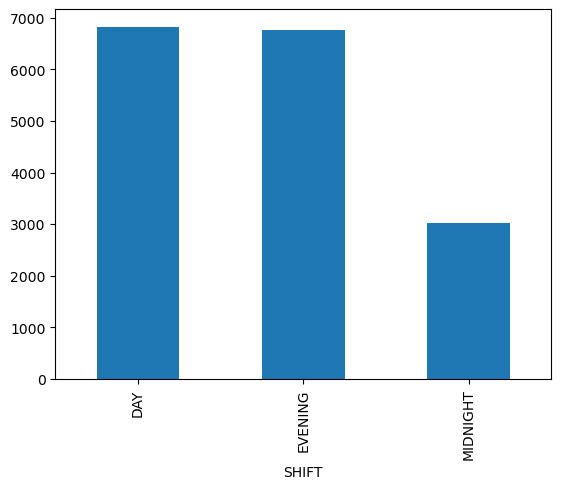

In [85]:
sum_crimes_by_shift.plot.bar()

<Axes: xlabel='CRIME'>

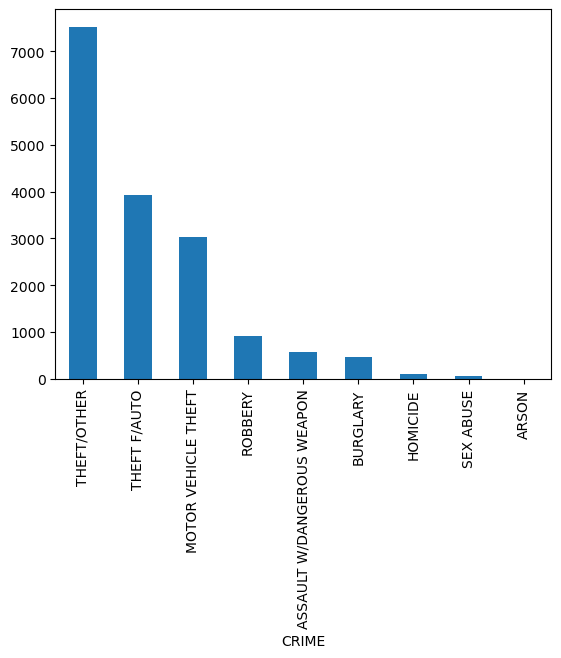

In [87]:
df['CRIME'].value_counts().plot.bar()